## 第四次恒星物理编程作业

#### Lane-Emden equation of index n:
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d \theta}{d \xi}\right)=-\theta^n
$$

为求解方便，将方程变为：
$$
\frac{d\theta}{d\xi}=\frac{u}{\xi^2}\\
\frac{du}{d \xi}=-\xi^2\theta^n
$$

### 一. 直接数值求解n取不同值时的结果

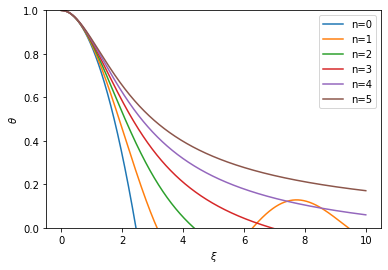

In [66]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#define the Lane-Emden equation
def LEeq(y,t,n):
    theta, u= y
    dydt=[u/t**2, -t**2*theta**n]
    return dydt
def solve_eq():
    y0=[1.0,0]       #initial value
    t=np.linspace(0.000001,10,1000)       #从0.000001开始计算除法保护
    poly=[]
    for n in range(6):
        y=odeint(LEeq, y0, t, args=(n,))
        poly.append(y)
    for n in range(6):
        plt.plot(t, poly[n][:,0 ], label=f'n={n}')
    plt.ylim([0,1])
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta$')
    plt.legend()
solve_eq()

这里给出了n取不同值时$\theta$与$\xi$关系图，注意到n=1时后端会有凸起，而作业题中已解析求出n=1时，$\theta=\frac{\sin\xi}{\xi}$，实际中我们只会考虑$\theta$的第一个零点，后面的凸起只是求解范围较大造成的

### 二. n=1.5/3 时恒星多方球的径向密度曲线

本来想用前面的方式求解，但是经常会有异常值，因此换了另一种方法。下面是利用差分的方法求解，迭代到零点就停止。

In [156]:
#set up function which can solve the lame emden equation for any value of 'n'.
def solve(n):
    """Solves the Lame-Emdem equation for any value of n.
    
    args: n
    """
    #create empty lists for theta and xi values to store them into
    theta_values = []
    xi_values = []
    dtheta_values = []
    #define values of xi, delta xi, the gradient and theta
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    
    #create a variable to store xi
    xi_now = xi
    
    #use while loop to find theta and xi values until theta=0
    while (theta >= 0) and (xi_now < 20):
        
        #increase xi value by small amount
        xi_now = xi_now + d_xi
    
        #calculate values after small increase in xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi

        #update the old values to be the new ones
        dtheta = dtheta_next
        theta  = theta_next
        
        #store these values in list
        theta_values.append(theta)
        xi_values.append(xi_now)
        dtheta_values.append(dtheta)
    
    #convert lists to arrays to make it easier to deal with
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    dtheta_values = np.array(dtheta_values)
    return (xi_values, theta_values, dtheta_values)

#call the function to find the theata and xi values for each n
xi_0, theta_0, dt0 = solve(0)
xi_1_5, theta_1_5, dt1_5 =solve(1.5)
xi_1, theta_1,dt1 = solve(1)
xi_2, theta_2, dt2 = solve(2)
xi_3, theta_3 , dt3= solve(3)
xi_4, theta_4 ,dt4= solve(4)
xi_5, theta_5 ,dt5= solve(5)

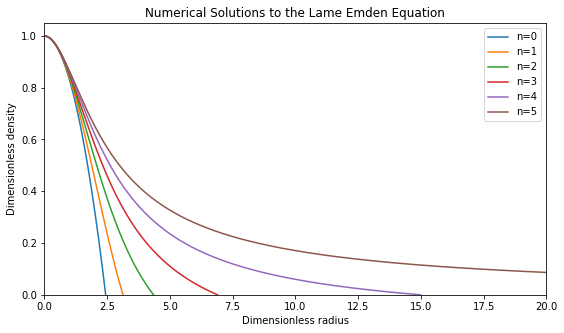

In [157]:
#plot the values of xi vs theta for each n value
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(xi_0, theta_0, label = 'n=0')
axis.plot(xi_1, theta_1, label = 'n=1')
axis.plot(xi_2, theta_2, label = 'n=2')
axis.plot(xi_3, theta_3, label = 'n=3')
axis.plot(xi_4, theta_4, label = 'n=4')
axis.plot(xi_5, theta_5, label = 'n=5')
#set limits on the axes
axis.set_ylim(0)
axis.set_xlim(0, 20)
#give title and axes labels
axis.set_title('Numerical Solutions to the Lame Emden Equation')
axis.set_ylabel('Dimensionless density')
axis.set_xlabel('Dimensionless radius')
#add a legend
axis.legend()
#show
plt.show()

<ipython-input-137-02696e8e87a0>:5: RuntimeWarning: invalid value encountered in power
  plt.plot(xi_1_5/xi0['1.5'], theta_1_5**1.5,label='n=1.5')


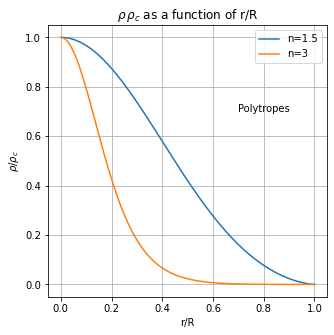

In [137]:
xi0={}
xi0['1.5']=xi_1_5[-1].round(2)
xi0['3']=xi_3[-1].round(2)
plt.figure(figsize=(5,5))
plt.plot(xi_1_5/xi0['1.5'], theta_1_5**1.5,label='n=1.5')
plt.plot(xi_3/xi0['3'], theta_3**3,label='n=3')
plt.legend()
plt.grid()
plt.xlabel('r/R')
plt.ylabel(r'$\rho/\rho_c$')
plt.title(r'$\rho\/\rho_c$ as a function of r/R')
plt.text(0.7, 0.7, 'Polytropes')
plt.show()

### 三. 计算无量纲参数$D_n,M_n,R_n,B_n$

In [182]:
class polytrope:
    def __init__(self,n,l):
        self.n=n
        self.l=l
    def D_n(self):
        return -1/(3/self.l[0]*self.l[1])
    def R_n(self):
        return self.l[0]
    def M_n(self):
        return -self.l[0]**2*self.l[1]
    def B_n(self):
        return 1/(self.n+1)*(1/self.M_n())**((n-1)/n)*(3*self.D_n())**((3-n)/(3*n))*(self.R_n())**((n-3)/n)
    def value(self):
        return [self.D_n(),self.M_n(),self.R_n(),self.B_n()]

In [184]:
import pandas as pd
result=[]
lst=[1.0,1.5,2.0,2.5,3.0,3.5]
for n in lst:
    xi, theta, dt=solve(n)
    xi_zero=xi[-1].round(3)
    deriva= dt[-1].round(3)
    temp=polytrope(n,[xi_zero,deriva])
    result.append(temp.value())
df=pd.DataFrame(result)
df=df.round(3)
columns=['Dn','Mn','Rn','Bn']
df.columns=columns
df

,Dn,Mn,Rn,Bn
0,3.292,3.137,3.141,0.233
1,5.998,2.709,3.653,0.206
2,11.425,2.406,4.353,0.186
3,23.491,2.180,5.356,0.170
4,54.762,2.000,6.900,0.158
5,151.492,1.913,9.544,0.144


从上表的计算结果可以看到，与书上给出的值误差基本在0.05以内，说明整个计算不存在较大问题